# Externalized recordings: load data, visually inspect, preprocessing

In [83]:

import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import h5py
import fooof
from fooof.plts.spectra import plot_spectrum

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 

#######################     USE THIS DIRECTORY FOR IMPORTING PYPERCEIVE REPO  #######################

# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
BetaSenSightLongterm_path = os.getcwd()
while BetaSenSightLongterm_path[-16:] != 'ResearchProjects':
    BetaSenSightLongterm_path = os.path.dirname(BetaSenSightLongterm_path)

# directory to PyPerceive code folder
PyPerceive_path = os.path.join(BetaSenSightLongterm_path,'PyPerceive_project', 'code', 'PyPerceive', 'code')
sys.path.append(PyPerceive_path)

# # change directory to PyPerceive code path within BetaSenSightLongterm Repo
os.chdir(PyPerceive_path)
os.getcwd()
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.bssu.monopolar.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.bssu.monopolar.externalized_lfp as externalized

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF
import src.bssu.utils.load_data_files as load_data

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni

# import Poly5 reader from extern
import src.bssu.extern.tmsi_poly5reader as poly5reader


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(load_data)
importlib.reload(externalized)
importlib.reload(poly5reader)
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


## 5a. Externalized real monopolar recordings: WRITE dataframe

In [ ]:
%matplotlib widget

In [ ]:
patient_metadata = load_data.load_patient_metadata_externalized()

In [55]:
poly5raw = load_data.load_externalized_Poly5_files(sub="48")

Reading file  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data/externalized_lfp/543IO66_MedOff01_Rest_StimOff_01 - 20220527T093557/543IO66_MedOff01_Rest_StimOff_01-20220527T093557.DATA.Poly5
	 Number of samples:  736600 
	 Number of channels:  32 
	 Sample rate: 4000 Hz
Done reading data.
Creating RawArray with float64 data, n_channels=32, n_times=736600
    Range : 0 ... 736599 =      0.000 ...   184.150 secs
Ready.


/Users/jenniferbehnke/Dropbox/work/ResearchProjects/BetaSenSightLongterm/code/BetaSenSightLongterm/src/bssu/extern/tmsi_poly5reader.py:94: RuntimeWarning: Channel names are not unique, found duplicates for: {'X', 'Y', 'Z'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names=labels, sfreq=fs, ch_types=types_clean)


In [40]:
sub_025 = load_data.load_BIDS_externalized_vhdr_files(sub="25")


Write the files with all externalized recordings: 
- n=16: ["25", "30", "32", "47", "52", "59", 
            "61", "64", "67", "69", "71", 
            "72", "75", "77", "79", "80"]

- missing in BIDS: n=6: ["24", "28", "29", "48", "49", "56"]

In [67]:
processed_LFP = externalized.preprocess_externalized_lfp(
    sub=["24", "25", "28", "29", "30", "32", "47", "48", "49",
         "52", "56", "59", "61", "64", "67", "69", "71", 
         "72", "75", "77", "79", "80"])

In [ ]:
group_data = processed_LFP["group_data"]
sub_025_1A = group_data.original_lfp.values[1]
sub_025_time = group_data.original_time_stamps[1]

sub025_original_2min = processed_LFP["mne_objects"]["25_original_2min"]
sub025_resampled_2min = processed_LFP["mne_objects"]["25_resampled_2min"]
sub025_resampled_2min.compute_psd(method="welch").plot()

In [ ]:

band_pass_filtered = data.filter(l_freq=5.0, h_freq=95.0)
# band pass and notch filter
filter_params = mne.filter.create_filter(
    data.get_data(), data.info["sfreq"], l_freq=5.0, h_freq=95.0
)
data.plot(highpass=5.0, lowpass=95.0, filtorder=5.0)

In [ ]:
# downsample to Percept sfreq
resampled = data.copy().resample(sfreq=250.0)
resampled.compute_psd(tmax=np.inf, fmax=125).plot(average=True, exclude="bads")
fig = data.compute_psd(tmax=np.inf, fmax=100).plot(average=True, exclude="bads")

In [ ]:
# butterworth filter: band pass -> filter order = 5, high pass 5 Hz, low-pass 95 Hz
# nodge filter: 48-52 Hz

# detect artefacts 
# remove artefacts (cut out)


## 5b. Externalized recordings: Load and plot 

load recording Info

In [68]:
rec_info = load_data.load_externalized_pickle(filename="externalized_recording_info_original")
rec_info

,subject,BIDS_id,ch_names,bads,sfreq,subject_info,number_time_stamps,recording_duration
original_information,024,sub-noBIDS24,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[],4000.0,no_bids,729252,3.03855
original_information,025,sub-L001,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L001', 'sex': 1, 'handedness':...",1216266,5.067775
original_information,028,sub-noBIDS28,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[],4000.0,no_bids,764361,3.184837
original_information,029,sub-noBIDS29,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[],4000.0,no_bids,723894,3.016225
original_information,030,sub-EL007,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-EL007', 'sex': 1, 'handedness'...",1242570,5.177375
original_information,032,sub-L003,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_08_STN_MT],4000.0,"{'his_id': 'sub-L003', 'sex': 1, 'handedness':...",735460,3.064417
original_information,047,sub-L007,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L007', 'sex': 2, 'handedness':...",1526564,6.360683
original_information,048,sub-noBIDS48,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[],4000.0,no_bids,736600,3.069167
original_information,049,sub-noBIDS49,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[],4000.0,no_bids,842828,3.511783
original_information,052,sub-EL014,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...","[LFP_R_07_STN_MT, LFP_L_01_STN_MT]",4000.0,"{'his_id': 'sub-EL014', 'sex': 1, 'handedness'...",1767570,7.364875


Load preprocessed data in a dataframe

In [69]:
preprocessed_data = load_data.load_externalized_pickle(filename="externalized_preprocessed_data")
preprocessed_data.head()

,BIDS_id,subject,hemisphere,subject_hemisphere,original_ch_name,contact,lfp_2_min,time_stamps,sfreq,sfreq_250Hz,lfp_resampled_250Hz,time_stamps_250Hz,filtered_lfp_4000Hz,filtered_lfp_250Hz,notch_filtered_lfp_4000Hz,notch_filtered_lfp_250Hz,n_samples_250Hz
LFP_R_01_STN_MT,noBIDS24,024,Right,024_Right,LFP_R_01_STN_MT,0,"[-0.0146489130859375, -0.014644931640625, -0.0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[-0.014650027539175887, -0.014658252839254222,...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[3.949032564210164e-06, 3.231238646820861e-06,...","[6.123400776917009e-07, -5.407946823371875e-06...","[-0.014649020332072119, -0.014645019531892444,...","[-0.014650034223547779, -0.01465810222211751, ...",30000
LFP_R_02_STN_MT,noBIDS24,024,Right,024_Right,LFP_R_02_STN_MT,1A,"[0.039686453125, 0.039691835937499996, 0.03968...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.03968639766579897, 0.03968883078857783, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[2.69323285735393e-06, 2.6718105241033025e-06,...","[8.025196923263087e-07, 2.69209607371728e-06, ...","[0.03968738279046979, 0.039692789180962064, 0....","[0.03968722269881189, 0.039689287285994766, 0....",30000
LFP_R_03_STN_MT,noBIDS24,024,Right,024_Right,LFP_R_03_STN_MT,1B,"[0.03292761328125, 0.032930234375, 0.032923703...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.032927483537599944, 0.03292990107505366, 0....","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[5.628119694315582e-06, 5.634421217695854e-06,...","[4.2740305276734576e-07, 2.710763405123185e-06...","[0.03292843330193877, 0.03293106172049701, 0.0...","[0.03292830267658198, 0.032930186661020676, 0....",30000
LFP_R_04_STN_MT,noBIDS24,024,Right,024_Right,LFP_R_04_STN_MT,1C,"[0.045496296874999995, 0.045501386718749995, 0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.04549634883916892, 0.045498958747322946, 0....","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[2.665509928098474e-06, 2.743510995010399e-06,...","[4.4935559260612634e-07, 2.595175289608499e-06...","[0.045497125986064764, 0.045502215819711804, 0...","[0.045497119265760756, 0.045499245919411194, 0...",30000
LFP_R_05_STN_MT,noBIDS24,024,Right,024_Right,LFP_R_05_STN_MT,2A,"[0.0427853984375, 0.042789980468749995, 0.0427...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.04278504138418886, 0.04278242301035655, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[1.3620866122894671e-06, 1.0821347147950646e-0...","[4.438050843228251e-07, -2.0337643064453155e-0...","[0.04278607873162297, 0.042790683789116275, 0....","[0.04278580619705029, 0.04278295419263754, 0.0...",30000


In [21]:
sfreq_250 = preprocessed_data.sfreq_250Hz.values[1]
data_250 = preprocessed_data.filtered_lfp_250Hz.values[1]

sfreq_4000 = preprocessed_data.sfreq.values[1]
data_4000 = preprocessed_data.filtered_lfp_4000Hz.values[1]

data_250_only_notch = preprocessed_data.notch_filtered_lfp_250.values[1]

In [86]:
data_250_only_notch = preprocessed_data.loc[preprocessed_data.BIDS_id == "L003"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.hemisphere == "Right"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.contact == "1A"]
only_notch = data_250_only_notch.notch_filtered_lfp_250Hz.values[0]
data_250_unfiltered = data_250_only_notch.lfp_resampled_250Hz.values[0]

In [87]:
if np.array_equal(only_notch, data_250_unfiltered):
    print("same")

### Compare LFP sfreq 4000 Hz to 250 Hz

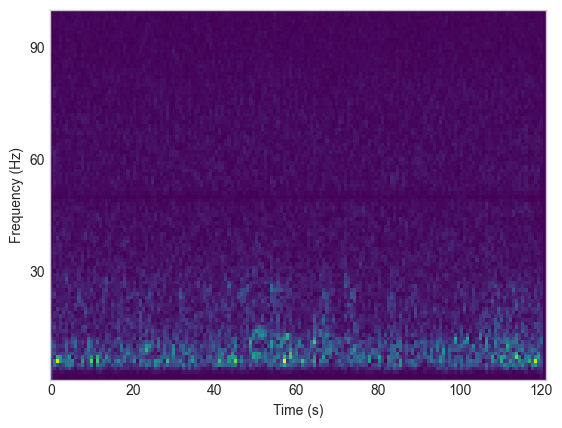

In [17]:
# sfreq 4000 Hz
fs = sfreq_4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_4000, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

In [34]:
Zxx.shape

(126, 161)

(0.0, 90.0)

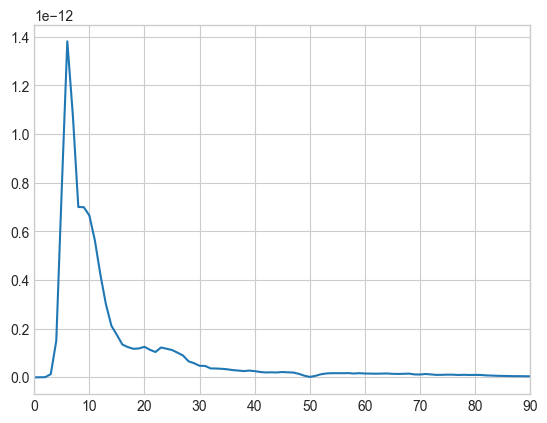

In [18]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

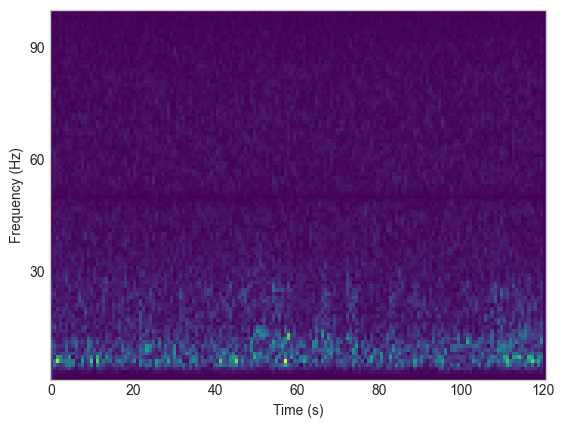

In [19]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_250, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

In [15]:
Zxx.shape

(126, 161)

(0.0, 90.0)

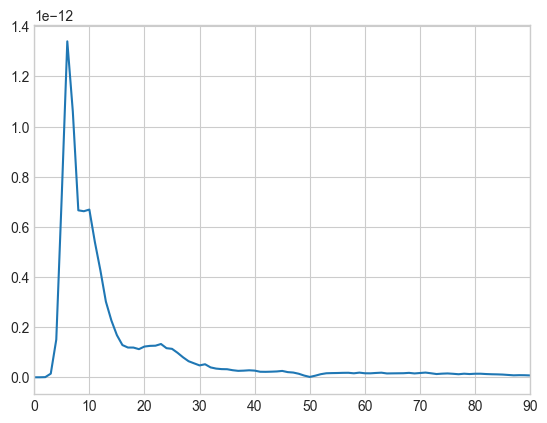

In [20]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

### Plot time frequency plots of all 250 Hz resampled channels:
- Identify and clean movement artefacts


Plot all time frequency plots


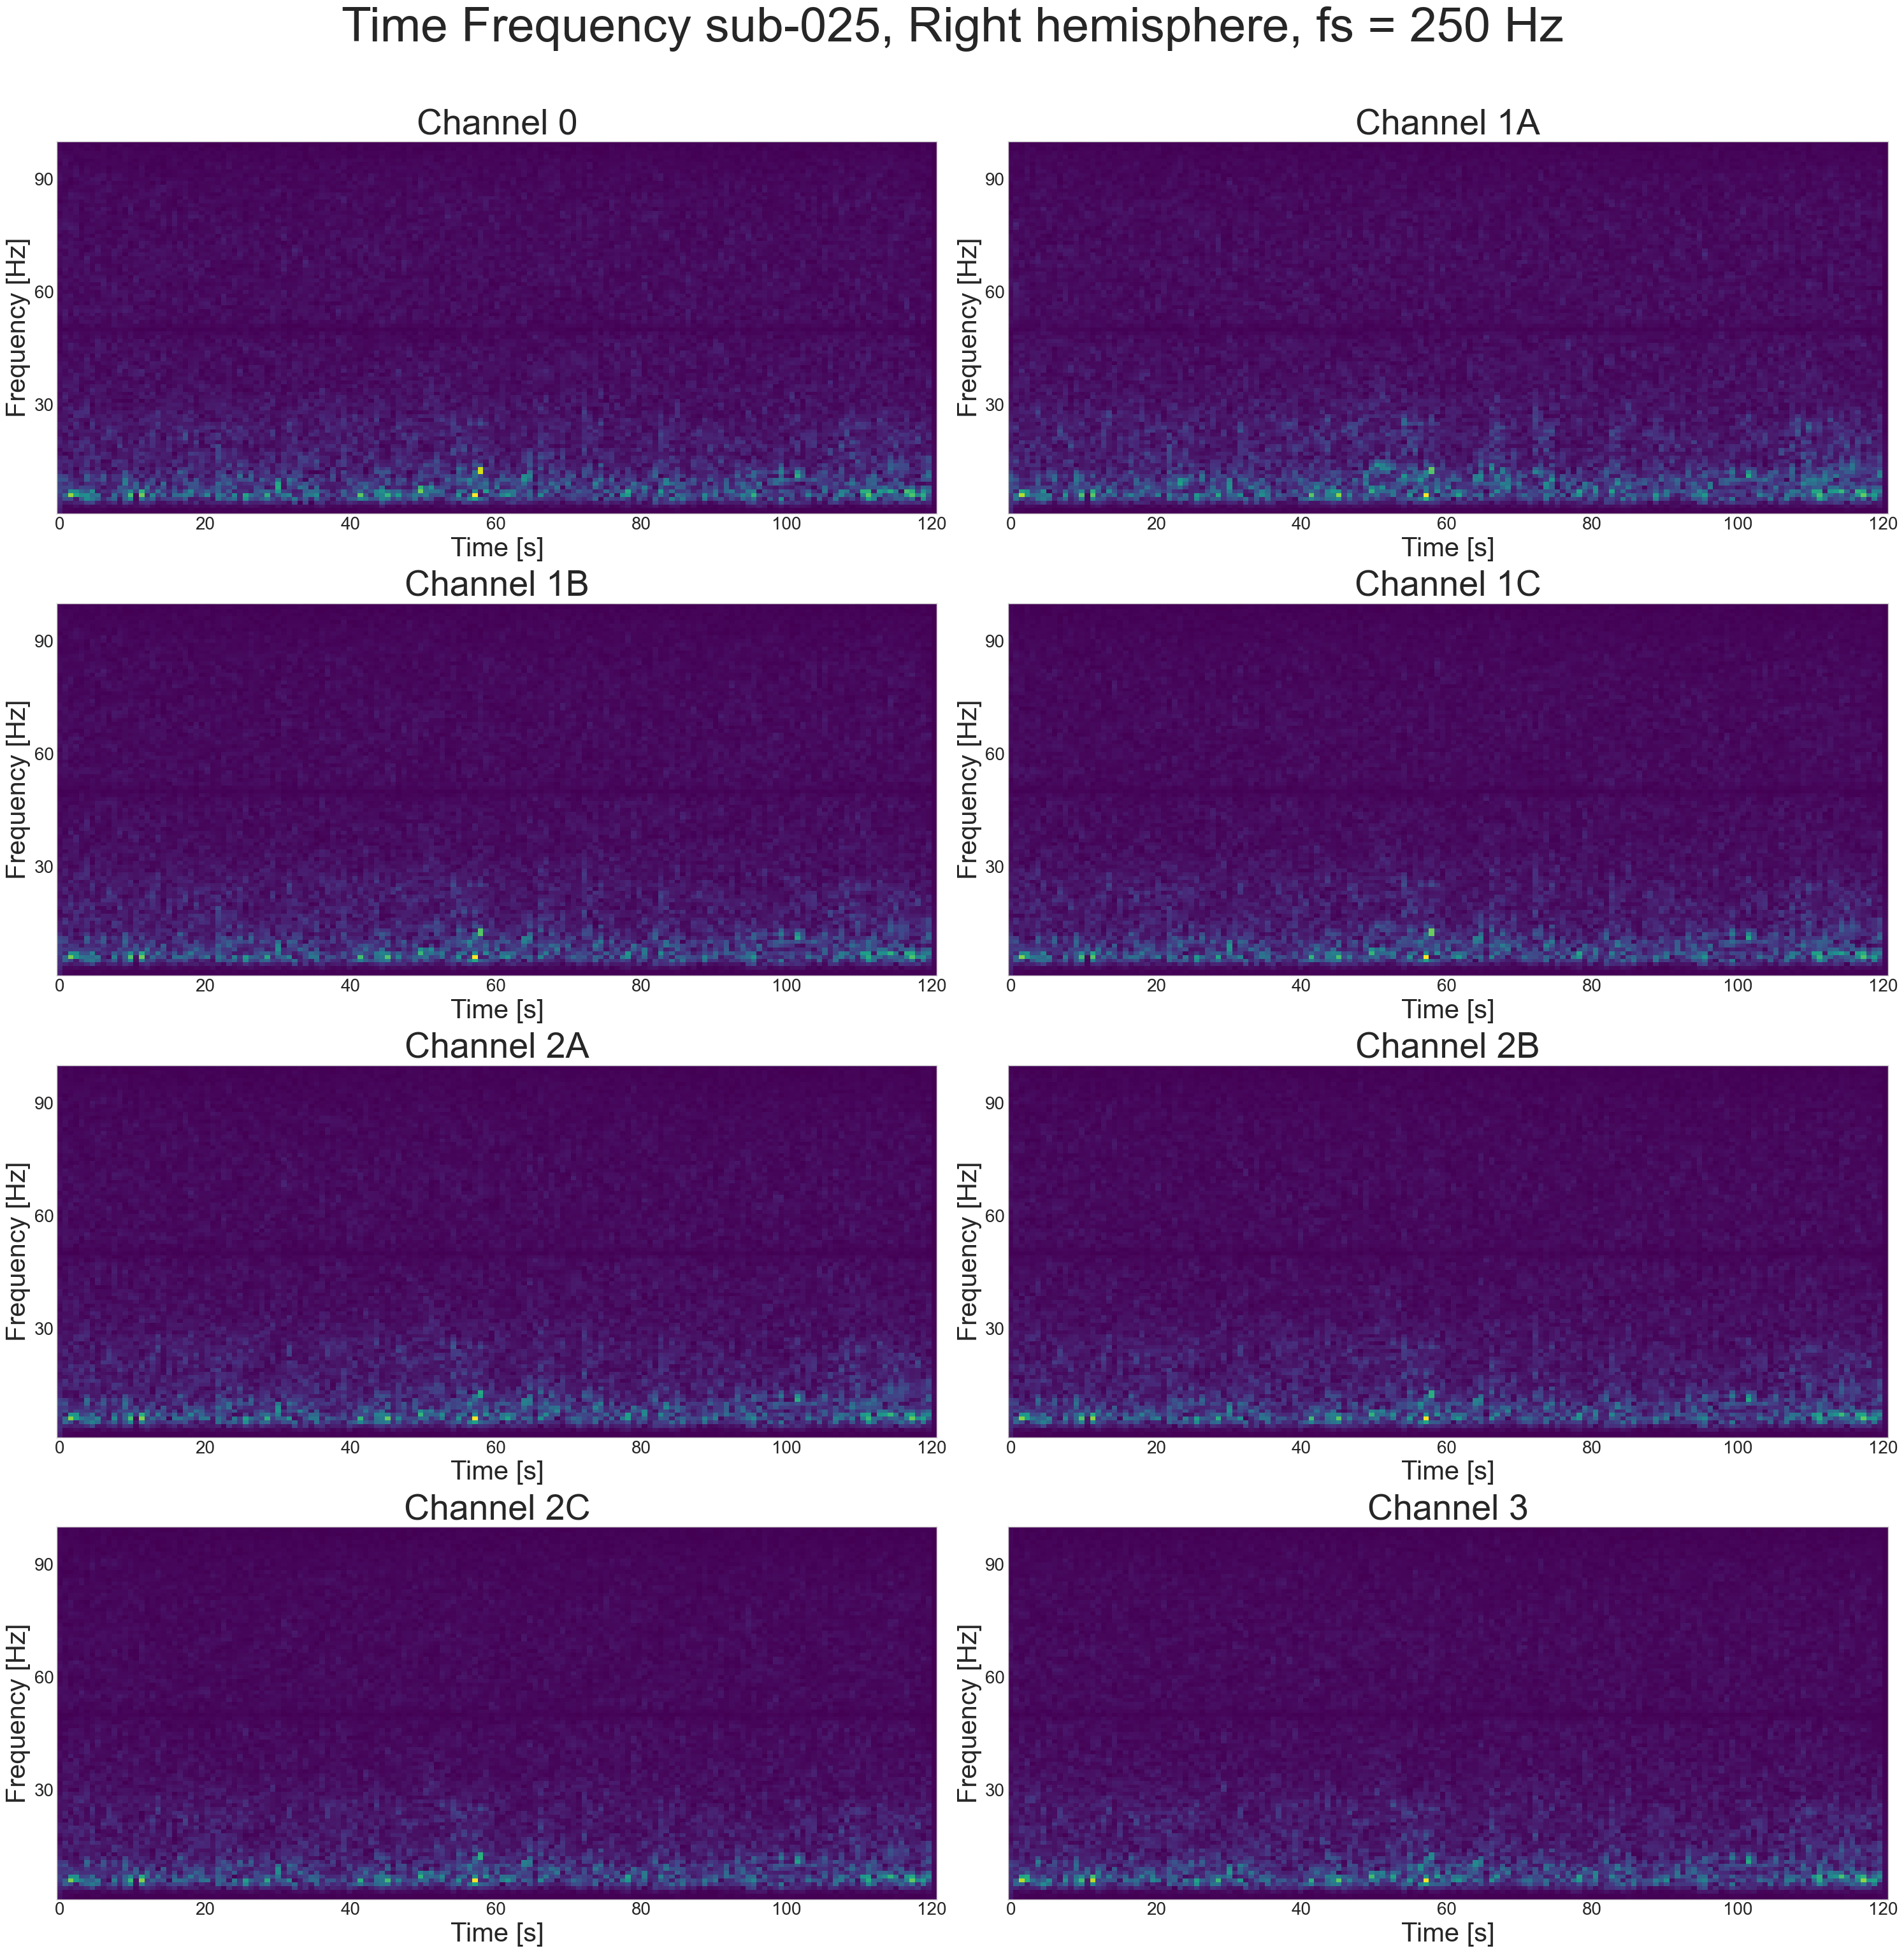

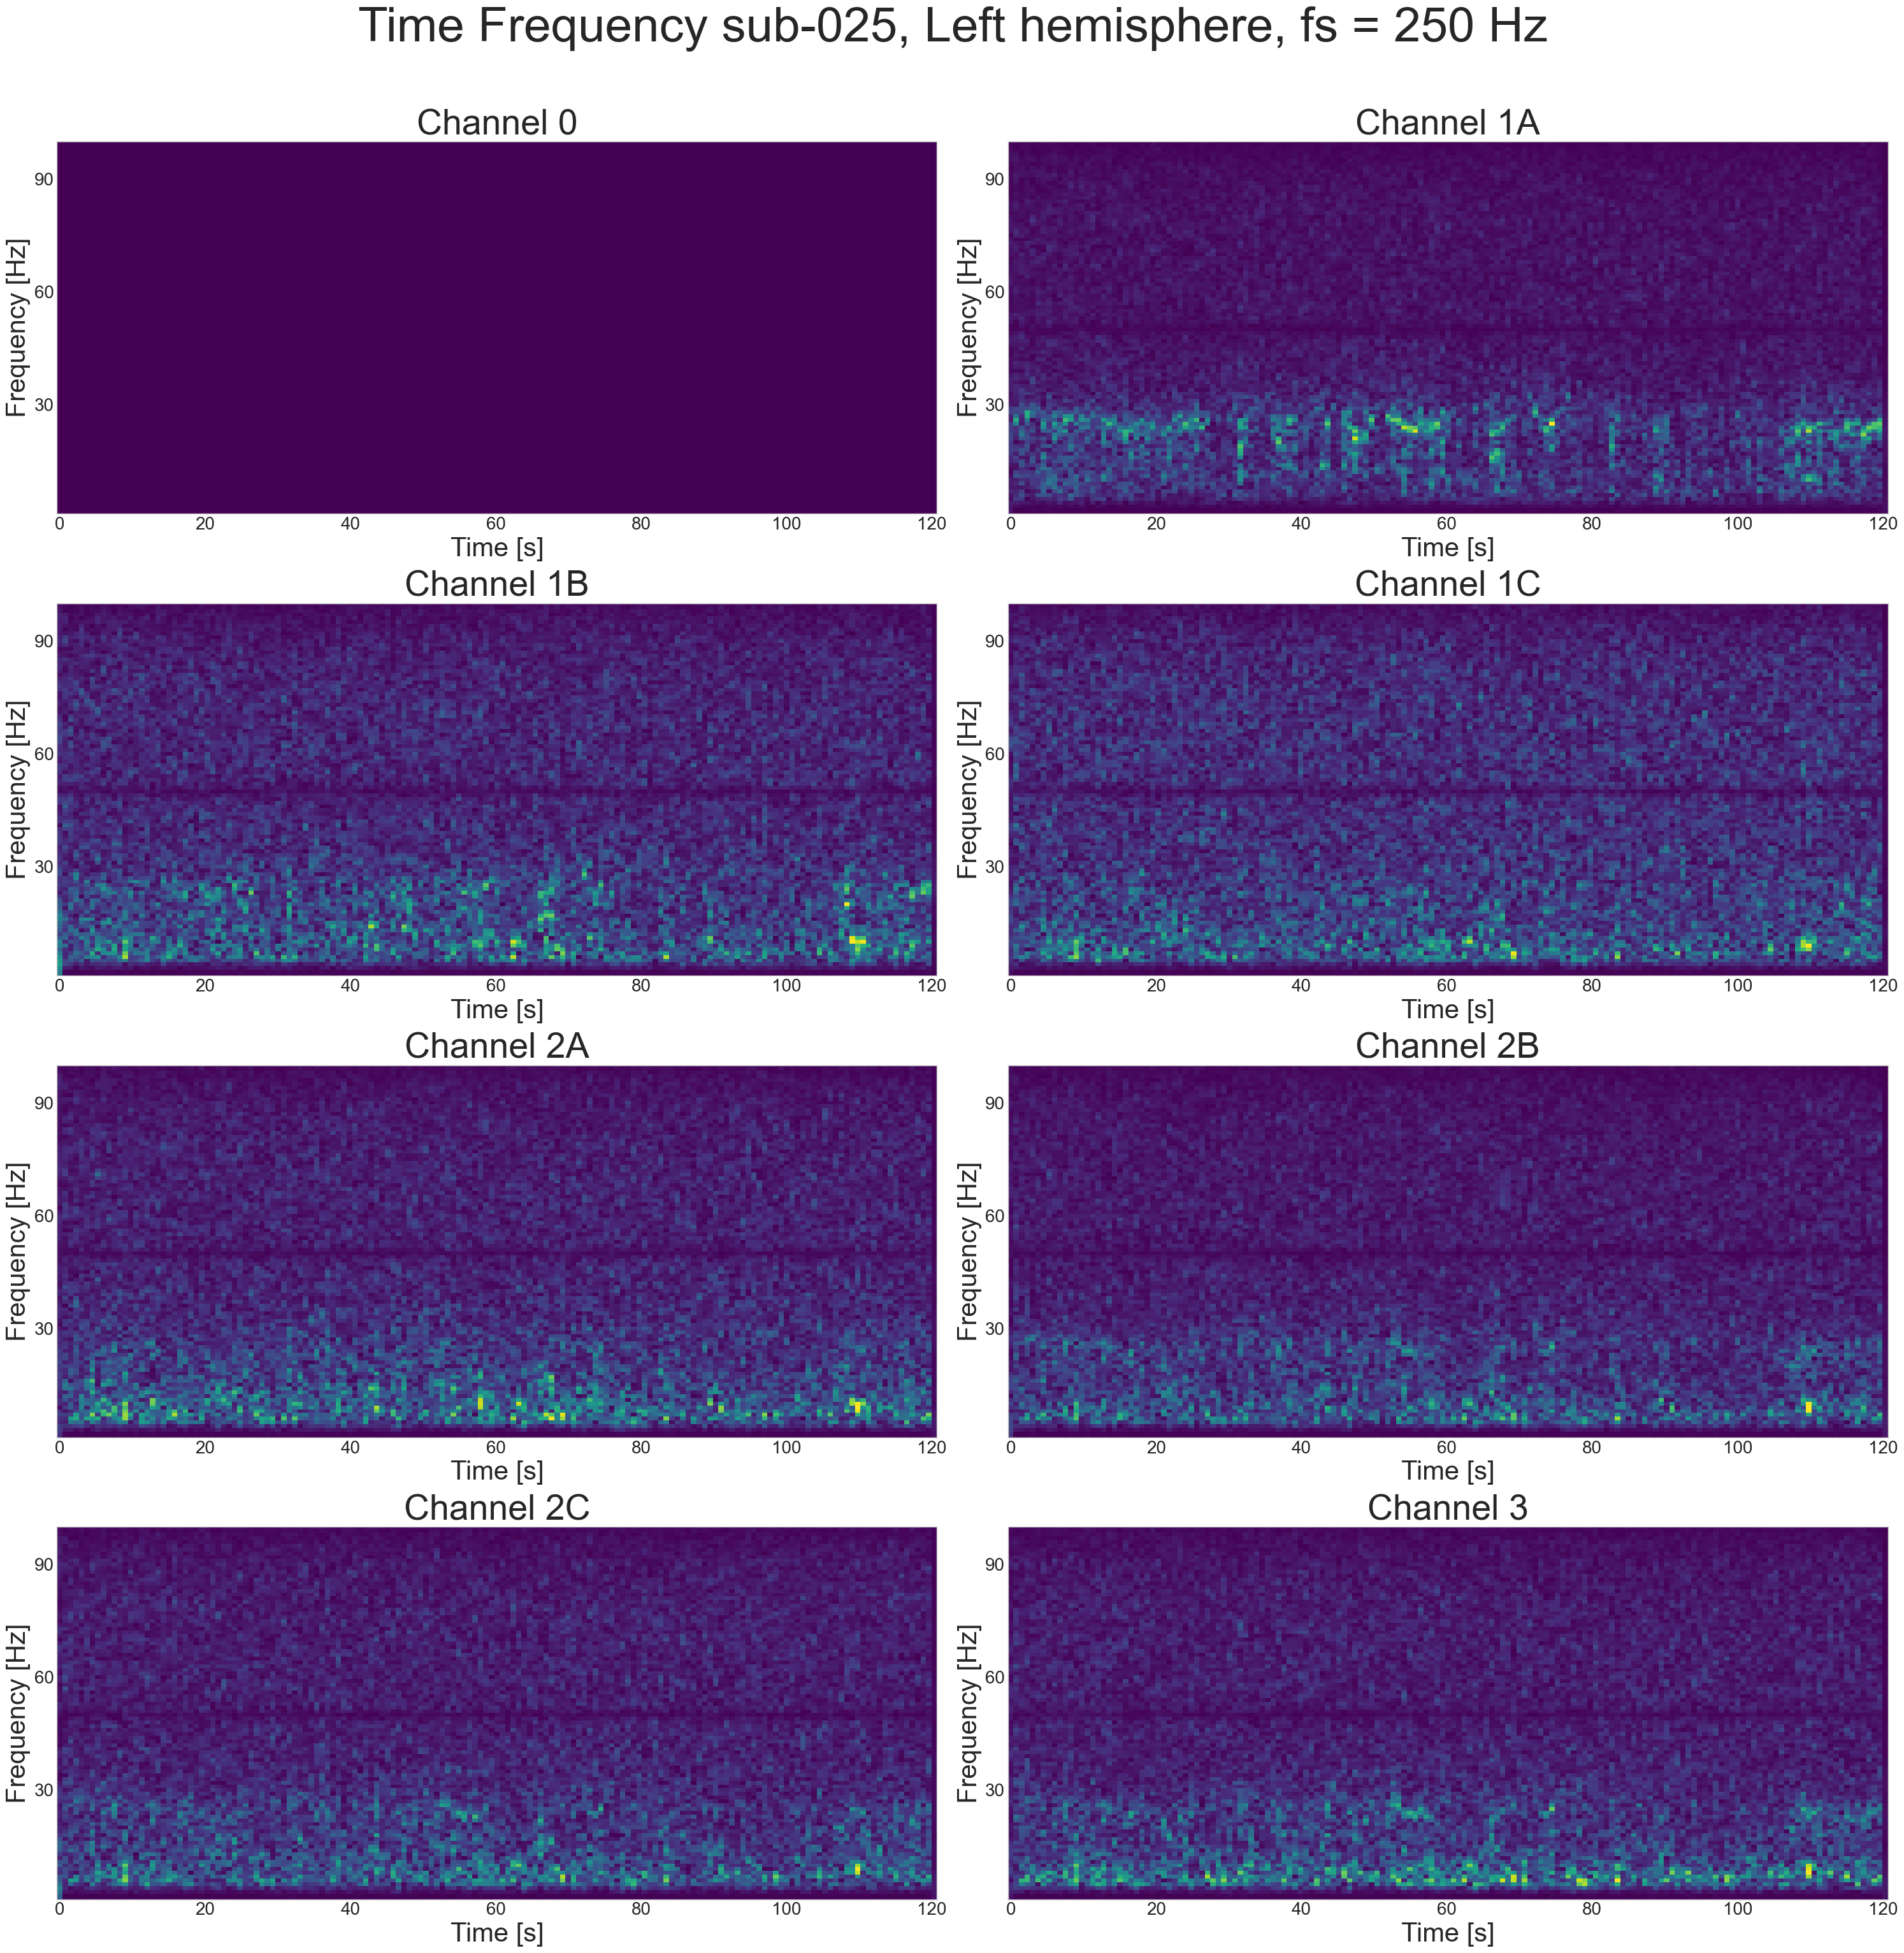

In [84]:
plot_time_frequency = externalized.fourier_transform_time_frequency_plots(
    incl_bids_id=["L001"]
)

Clean all artefacts, plot new clean time frequency plots and save a new pickle file
- externalized_preprocessed_data_artefact_free.pickle

In [73]:
# cleans all artefacts, if there artefacts noted in the artefact Excel sheet
artefact_free_lfp = externalized.clean_artefacts()

In [74]:
artefact_free_lfp = load_data.load_externalized_pickle(filename="externalized_preprocessed_data_artefact_free")

In [75]:
artefact_free_lfp.head()

,BIDS_id,subject,hemisphere,subject_hemisphere,original_ch_name,contact,lfp_2_min,time_stamps,sfreq,sfreq_250Hz,lfp_resampled_250Hz,time_stamps_250Hz,filtered_lfp_4000Hz,filtered_lfp_250Hz,notch_filtered_lfp_4000Hz,notch_filtered_lfp_250Hz,n_samples_250Hz
0,noBIDS24,024,Right,024_Right,LFP_R_01_STN_MT,0,"[-0.0146489130859375, -0.014644931640625, -0.0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[-0.014650027539175887, -0.014658252839254222,...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[3.949032564210164e-06, 3.231238646820861e-06,...","[6.123400776917009e-07, -5.407946823371875e-06...","[-0.014649020332072119, -0.014645019531892444,...","[-0.014650034223547779, -0.01465810222211751, ...",30000
1,noBIDS24,024,Right,024_Right,LFP_R_02_STN_MT,1A,"[0.039686453125, 0.039691835937499996, 0.03968...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.03968639766579897, 0.03968883078857783, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[2.69323285735393e-06, 2.6718105241033025e-06,...","[8.025196923263087e-07, 2.69209607371728e-06, ...","[0.03968738279046979, 0.039692789180962064, 0....","[0.03968722269881189, 0.039689287285994766, 0....",30000
2,noBIDS24,024,Right,024_Right,LFP_R_03_STN_MT,1B,"[0.03292761328125, 0.032930234375, 0.032923703...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.032927483537599944, 0.03292990107505366, 0....","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[5.628119694315582e-06, 5.634421217695854e-06,...","[4.2740305276734576e-07, 2.710763405123185e-06...","[0.03292843330193877, 0.03293106172049701, 0.0...","[0.03292830267658198, 0.032930186661020676, 0....",30000
3,noBIDS24,024,Right,024_Right,LFP_R_04_STN_MT,1C,"[0.045496296874999995, 0.045501386718749995, 0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.04549634883916892, 0.045498958747322946, 0....","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[2.665509928098474e-06, 2.743510995010399e-06,...","[4.4935559260612634e-07, 2.595175289608499e-06...","[0.045497125986064764, 0.045502215819711804, 0...","[0.045497119265760756, 0.045499245919411194, 0...",30000
4,noBIDS24,024,Right,024_Right,LFP_R_05_STN_MT,2A,"[0.0427853984375, 0.042789980468749995, 0.0427...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...",4000.0,250.0,"[0.04278504138418886, 0.04278242301035655, 0.0...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...","[1.3620866122894671e-06, 1.0821347147950646e-0...","[4.438050843228251e-07, -2.0337643064453155e-0...","[0.04278607873162297, 0.042790683789116275, 0....","[0.04278580619705029, 0.04278295419263754, 0.0...",30000


from the raw signal cut out a segment with an artefact

In [35]:
sfreq_250 = preprocessed_data.sfreq_250Hz.values[1]
data_250 = preprocessed_data.filtered_lfp_250Hz.values[1]


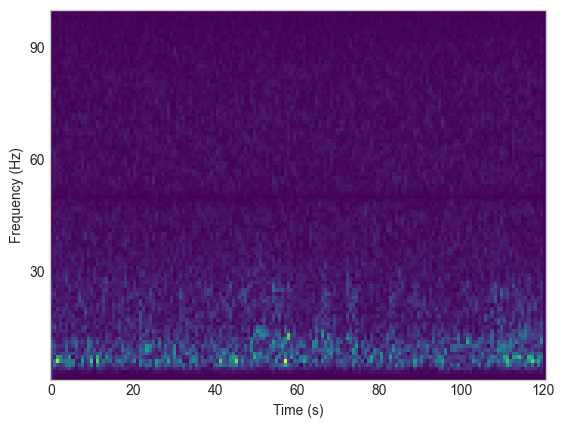

In [36]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(data_250, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

Cut out 50 - 62 s


In [49]:
# data_250.shape # 30000 samples, 250 samples/s, 120 sec
# X = 250 * input sec
# sec 50 - 62 = samples 
# 12.500 sample = 250 * 50 sec
# 15.500 sample = 250 * 62 sec

# data_250_clean_1 = data_250[0: 50sec+1]
# data_250_clean_2 = data_250[62sec:30000]

# clean_data = np.concatenate([data_250_clean_1, data_250_clean_2])
fs = sfreq_250
artefact_start = 50
artefact_stop = 62

sample_start = int(fs * artefact_start)
sample_stop = int(fs * artefact_stop)

data_clean_1 = data_250[0:sample_start+1]
data_clean_2 = data_250[sample_stop:30000]

clean_data = np.concatenate([data_clean_1, data_clean_2])

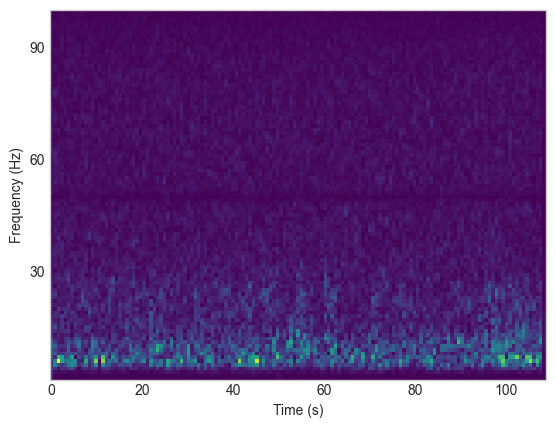

In [50]:
# sfreq 250 Hz
fs = sfreq_250
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hamming window
window = hann(window_length, sym=False)

frequencies, times, Zxx = signal.stft(clean_data, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')
axs.set_ylim(1, 100)

plt.show()

Load the MNE objects of the cropped 2 min LFP recordings

In [114]:
mne_objects = load_data.load_externalized_pickle(filename="mne_objects_cropped_2_min")
mne_objects

{'25_original_2min': <RawBrainVision | sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '30_original_2min': <RawBrainVision | sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '32_original_2min': <RawBrainVision | sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '47_original_2min': <RawBrainVision | sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '52_original_2min': <RawBrainVision | sub-EL014_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '59_original_2min': <RawBrainVision | sub-EL016_ses-EcogLfpMedOffDys01_task-Rest_acq-StimOffDopaPre_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '61_original_2min': <RawBrainVision | sub-L010_ses-LfpMedOffDy

Effective window size : 0.512 (s)
Need more than one channel to make topography for dbs. Disabling interactivity.


/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_87578/1630132626.py:4: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  spectrum.plot(picks="LFP_R_02_STN_MT")
/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_87578/1630132626.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  spectrum.plot(picks="LFP_R_02_STN_MT")
/Users/jenniferbehnke/anaconda3/envs/bssu/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


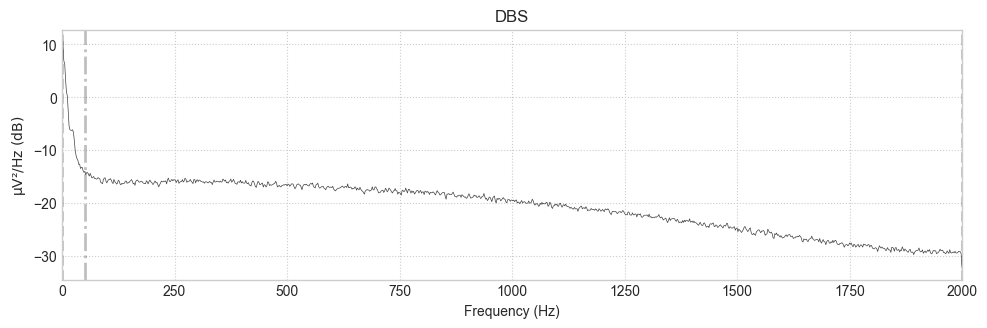

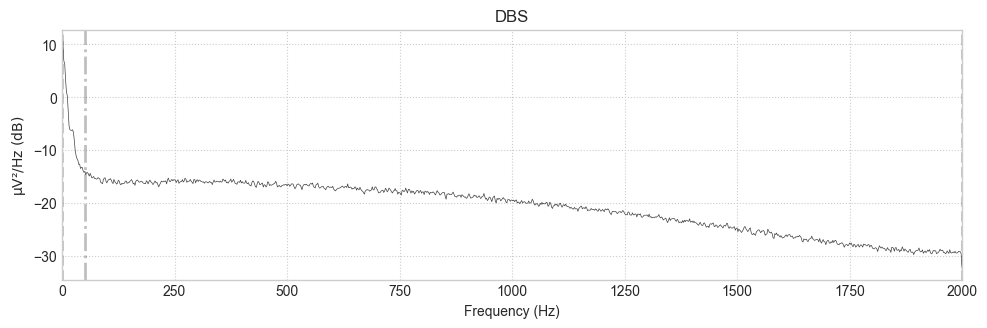

In [115]:
raw = mne_objects["25_original_2min"]
# raw.plot()
spectrum = raw.compute_psd()
spectrum.plot(picks="LFP_R_02_STN_MT")

In [ ]:
# downsample to 4000 Hz and to 250 Hz

Plot the raw signals and filter line noise

In [218]:
# get an example original cropped signal
sub025_1A = preprocessed_data.lfp_2_min.values[1]
sub025_timestamps = preprocessed_data.time_stamps.values[1]
sub025_1A

array([0.04113793, 0.0411472 , 0.04115371, ..., 0.04123406, 0.04123497,
       0.04123966])

In [219]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap
notch_freq = 50 # 50 Hz line noise in Europe
Q = 30 # Q factor for notch filter

# apply notch filter
b, a = scipy.signal.iirnotch(w0=notch_freq, Q=Q, fs=fs)
filtered_signal = scipy.signal.filtfilt(b, a, sub025_1A)


In [266]:
# set filter parameters for band-pass filter
filter_order = 3 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter 
frequency_cutoff_high = 95 # 95 Hz low-pass filter
fs = 4000

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)
band_pass_filtered = scipy.signal.filtfilt(b, a, filtered_signal) 

In [267]:
band_pass_filtered # ????

array([-2.19025539e-06, -1.26085267e-06, -3.37861237e-07, ...,
       -4.70026647e-06, -4.27250518e-06, -3.84178522e-06])

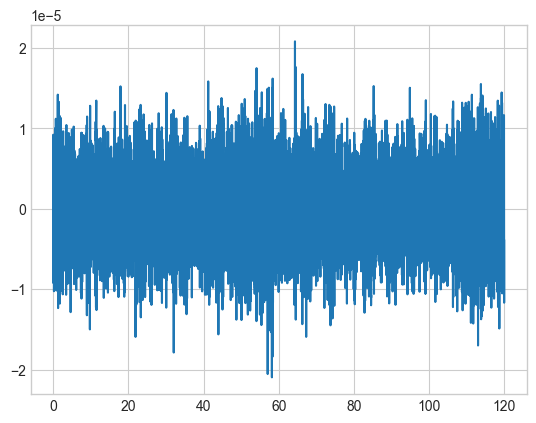

In [268]:
fig, axes = plt.subplots(1, 1)

#axes.set_ylim(0.041, 0.0414)
axes.plot(sub025_timestamps, band_pass_filtered)



plt.show()


Option 1:

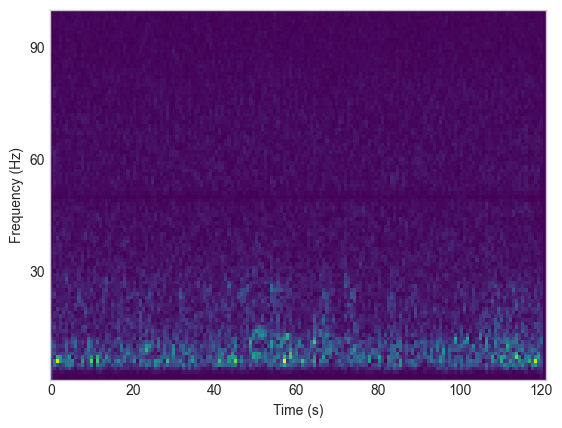

In [300]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

frequencies, times, Zxx = signal.stft(band_pass_filtered, fs=fs, nperseg=window_length, noverlap=overlap, window='hamming')
# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
# Hamming Window
# Zxx with imaginary values -> take the absolute!


# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)

axs.pcolormesh(times, frequencies, np.abs(Zxx), shading='auto', cmap='viridis') # -1, +1, zscore over time
# Varvara: axs.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto', cmap='viridis', vmin=-200, vmax = -70) # -1, +1, zscore over time
# Percept: axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis', vmin=-200, vmax = -60)


axs.set_yticks(np.arange(0, 512, 30))

axs.set_xlabel('Time (s)')

axs.set_ylabel('Frequency (Hz)')

#plt.colorbar(label='Amplitude (dB)')

axs.set_ylim(1, 100)



plt.show()

In [227]:
times.shape

(162,)

In [228]:
frequencies.shape

(2001,)

In [229]:
Zxx.shape

(2001, 162)

(0.0, 90.0)

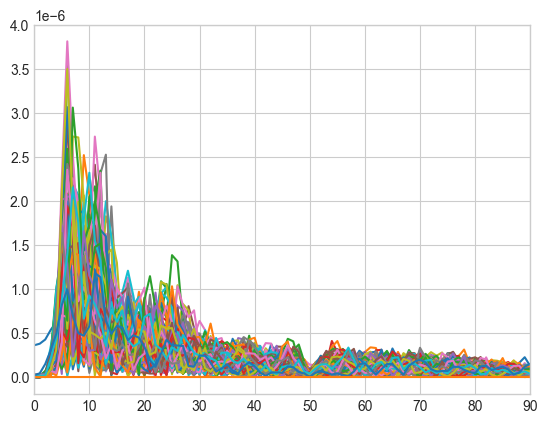

In [270]:
plt.plot(np.abs(Zxx)) # squared magnitude
plt.xlim([0, 90])

(0.0, 90.0)

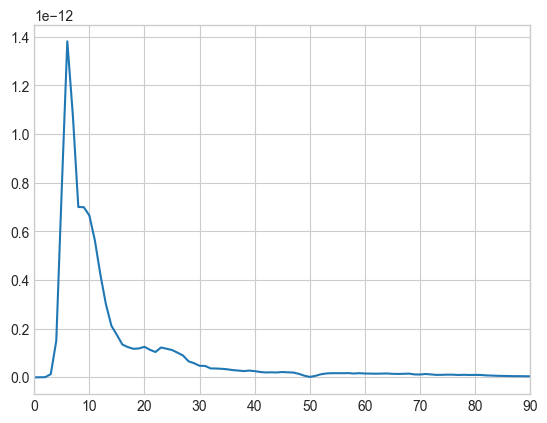

In [281]:
# average PSD across duration of the recording
average_Zxx = np.mean(np.abs(Zxx), axis=1) 

plt.plot(frequencies, average_Zxx**2) # has to be squared!
plt.xlim([0, 90])

Option 2:

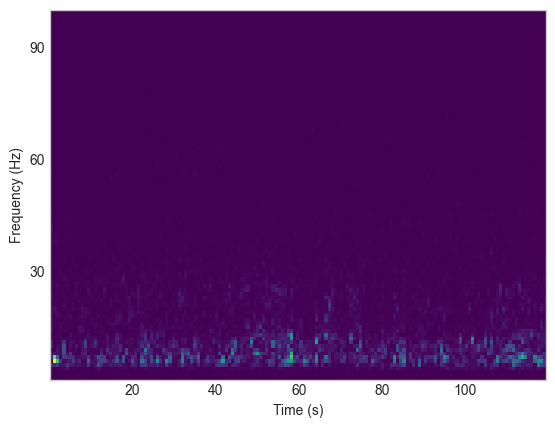

In [277]:
fs = 4000
window_length = int(fs) # 1 second window length
overlap = window_length // 4 # 25% overlap

# Calculate the short-time Fourier transform (STFT) using Hann window
window = hann(window_length, sym=False)

# Frequencies: 0-2000 Hz (1 Hz resolution)
# times: len=162, 0, 0.75, 1.5 .... 120.75
# Zxx: 2001 arrays, each len=162
frequencies, times, Zxx = scipy.signal.spectrogram(band_pass_filtered, fs=fs, window=window, noverlap=overlap, scaling="density", mode="psd", axis=0)
# this function computes the PSD directly

# Plot the spectral amplitudes
fig, axs = plt.subplots(1, 1)


axs.pcolormesh(times, frequencies, Zxx, shading='auto', cmap='viridis') # -1, +1, zscore over time
# axs.specgram(x=band_pass_filtered, Fs = fs, noverlap=0, cmap='viridis')


axs.set_yticks(np.arange(0, 512, 30))

axs.set_xlabel('Time (s)')

axs.set_ylabel('Frequency (Hz)')

#plt.colorbar(label='Amplitude (dB)')

axs.set_ylim(1, 100)



plt.show()

In [273]:
Zxx

array([[6.46437401e-16, 2.47326886e-16, 1.09113187e-14, ...,
        1.92294502e-16, 1.43206127e-14, 3.27999118e-14],
       [3.25200309e-16, 2.15256974e-19, 4.81071753e-15, ...,
        1.45814374e-16, 6.13961036e-15, 1.46834501e-14],
       [2.86530071e-15, 1.31610115e-15, 2.66859833e-15, ...,
        6.12193309e-16, 3.60726584e-16, 2.30462251e-15],
       ...,
       [1.59000218e-33, 9.85202316e-35, 1.07194008e-34, ...,
        3.07551176e-36, 7.40492531e-35, 2.66352586e-35],
       [1.58965926e-33, 9.83595448e-35, 1.06792233e-34, ...,
        3.07521154e-36, 7.36135361e-35, 2.65496914e-35],
       [7.94771229e-34, 4.91525705e-35, 5.33298133e-35, ...,
        1.53749507e-36, 3.67341237e-35, 1.32605094e-35]])

(0.0, 90.0)

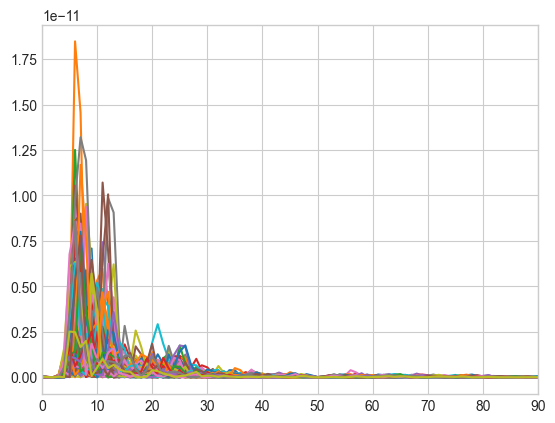

In [274]:
plt.plot(Zxx)
plt.xlim([0, 90])

(0.0, 90.0)

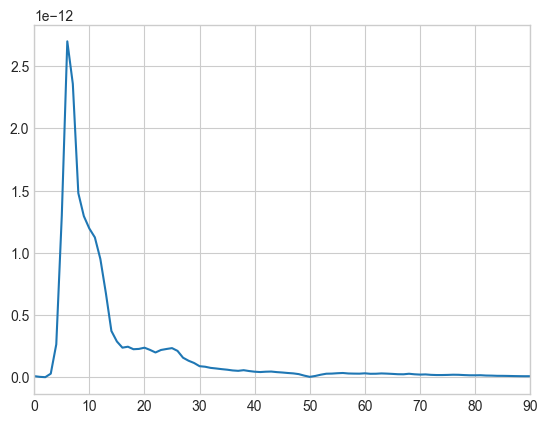

In [278]:
# average PSD across duration of the recording
average_Zxx = np.mean(Zxx, axis=1)

plt.plot(frequencies, average_Zxx)
plt.xlim([0, 90])

In [276]:
# FILTER: NOTCH and LOW, HIGH PASS
# sample frequency: 250 Hz
fs = preprocessed_data.resampled_sfreq.values[1]

# set filter parameters for band-pass filter
filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter
frequency_cutoff_high = 95 # 95 Hz low-pass filter

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)


AttributeError: 'DataFrame' object has no attribute 'resampled_sfreq'

In [15]:
band_pass_filtered = scipy.signal.filtfilt(b, a, sub025_1A_resampled)

(array([[9.61530952e-12, 1.88501627e-11, 1.50461859e-11, ...,
         5.43574363e-12, 2.46486404e-14, 1.62972950e-12],
        [1.07909555e-11, 1.39377777e-11, 5.53914223e-12, ...,
         1.09332718e-11, 1.58342623e-12, 2.29883960e-11],
        [2.35033062e-14, 5.46499555e-14, 1.59073379e-12, ...,
         4.29067698e-12, 2.05497331e-12, 2.29038520e-12],
        ...,
        [2.16931534e-26, 1.41231330e-27, 4.02565590e-27, ...,
         2.62602663e-27, 4.69393115e-27, 1.12384189e-26],
        [1.68908213e-26, 1.11465326e-27, 4.12497041e-27, ...,
         1.05032923e-27, 2.11868874e-27, 1.08820083e-26],
        [7.64576358e-27, 5.08755106e-28, 2.07979787e-27, ...,
         2.62878180e-28, 6.31026026e-28, 5.38235710e-27]]),
 array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
          4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
          9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
         14.6484375,  15.625    ,  16.6015625,

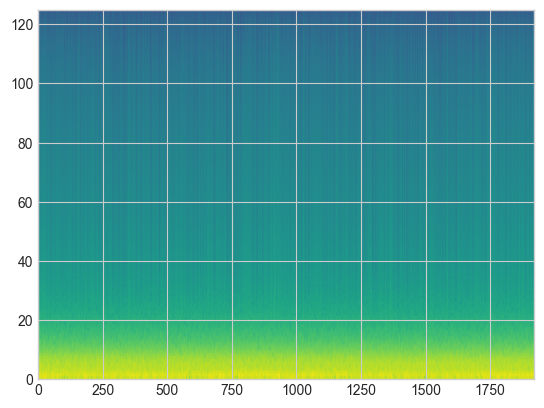

In [71]:
plt.specgram(
    x=band_pass_filtered,
    Fs=250,
    noverlap=0,
    cmap="viridis"
    )

### Plot Power Spectra of filtered 250 Hz artefact-free externalized LFP

In [77]:
# Transform fs=250 Hz 2 min signals to Power Spectra, save the Power values and plot all filtered Power Spectra
power_spectra = externalized.fourier_transform_to_psd()

In [85]:
power_spectra_data =load_data.load_externalized_pickle(filename="externalized_power_spectra_250Hz_artefact_free")
power_spectra_data.head()

,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,filtered,lfp_data,frequencies,times,power,power_average_over_time,power_std,power_sem
noBIDS24_Right_0_filtered,noBIDS24,024,Right,024_Right,0,LFP_R_01_STN_MT,filtered,"[6.123400776917009e-07, -5.407946823371875e-06...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[2.6093368309509195e-15, 5.958235905663751e-1...","[1.215474325739109e-14, 5.3821856513193714e-15...","[1.9453401404067883e-14, 8.53207471609916e-15,...","[1.5427550831107605e-15, 6.766375383068123e-16..."
noBIDS24_Right_0_unfiltered,noBIDS24,024,Right,024_Right,0,LFP_R_01_STN_MT,unfiltered,"[-0.014650027539175887, -0.014658252839254222,...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[1.2869244024232164e-11, 2.782443287649671e-1...","[6.765894906801873e-12, 3.072512305777026e-11,...","[6.5925530723269e-12, 2.11352231200171e-11, 1....","[5.228234667939871e-13, 1.6761322209836344e-12..."
noBIDS24_Right_0_notch-filtered,noBIDS24,024,Right,024_Right,0,LFP_R_01_STN_MT,notch-filtered,"[-0.014650034223547779, -0.01465810222211751, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[1.2861662104117226e-11, 2.7863855342692087e-...","[6.7663390811598665e-12, 3.072547520815522e-11...","[6.592698208390153e-12, 2.1134405690325447e-11...","[5.228349768324978e-13, 1.6760673945923163e-12..."
noBIDS24_Right_1A_filtered,noBIDS24,024,Right,024_Right,1A,LFP_R_02_STN_MT,filtered,"[8.025196923263087e-07, 2.69209607371728e-06, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[2.729779263443189e-14, 6.458496712813338e-15...","[8.279795074592877e-15, 3.6137282608466276e-15...","[1.0335502939813657e-14, 4.4447231480686875e-1...","[8.196586995613761e-16, 3.524894740654014e-16,..."
noBIDS24_Right_1A_unfiltered,noBIDS24,024,Right,024_Right,1A,LFP_R_02_STN_MT,unfiltered,"[0.03968639766579897, 0.03968883078857783, 0.0...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[1.2142201295707807e-11, 4.426249751465591e-1...","[4.580634676591733e-12, 2.1459927507922658e-11...","[4.679122181779329e-12, 1.7440305068198587e-11...","[3.7107852660290394e-13, 1.3831061589743076e-1..."


In [92]:
power_unfiltered = power_spectra_data.loc[power_spectra_data.filtered == "unfiltered"]
power_unfiltered = power_unfiltered.loc[power_unfiltered.BIDS_id == "L001"]
power_unfiltered = power_unfiltered.loc[power_unfiltered.hemisphere == "Right"]
power_unfiltered = power_unfiltered.loc[power_unfiltered.contact == "1A"]
power_no_filter = power_unfiltered.power_average_over_time.values[0]

In [93]:
power_unfiltered

,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,filtered,lfp_data,frequencies,times,power,power_average_over_time,power_std,power_sem
L001_Right_1A_unfiltered,L001,025,Right,025_Right,1A,LFP_R_02_STN_MT,unfiltered,"[0.04113918003087577, 0.04115062690047614, 0.0...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[1.3629756577203503e-12, 5.210482416985302e-1...","[8.060497209650237e-12, 3.942670102156593e-11,...","[7.472050982021948e-12, 2.7811069843630833e-11...","[6.060633645325551e-13, 2.255775636600344e-12,..."


In [94]:
data_250_only_notch = power_spectra_data.loc[power_spectra_data.filtered == "notch-filtered"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.BIDS_id == "L001"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.hemisphere == "Right"]
data_250_only_notch = data_250_only_notch.loc[data_250_only_notch.contact == "1A"]
power_notch = data_250_only_notch.power_average_over_time.values[0]
power_notch

array([8.06048461e-12, 3.94266565e-11, 1.77135922e-11, 4.97046511e-12,
       4.18015807e-12, 4.29843457e-12, 4.45822509e-12, 2.90341679e-12,
       1.55106672e-12, 1.34275709e-12, 1.21581128e-12, 1.09391141e-12,
       8.79351514e-13, 6.26887739e-13, 3.98406678e-13, 2.79471824e-13,
       2.34639424e-13, 2.33011328e-13, 2.14411574e-13, 2.23996546e-13,
       2.43290543e-13, 2.22908080e-13, 2.01994021e-13, 2.18671651e-13,
       2.20742746e-13, 2.22289434e-13, 2.11651188e-13, 1.57661395e-13,
       1.31870186e-13, 1.16521966e-13, 9.67395449e-14, 8.76073692e-14,
       7.48380401e-14, 6.92779618e-14, 6.35049370e-14, 5.90387941e-14,
       5.37235348e-14, 5.28290447e-14, 5.54433435e-14, 5.07569273e-14,
       4.64054534e-14, 4.29018984e-14, 4.48105685e-14, 4.60039529e-14,
       4.14262215e-14, 4.00989867e-14, 3.37356961e-14, 3.19155767e-14,
       2.76968827e-14, 1.40157895e-14, 3.96951543e-15, 1.13281233e-14,
       2.19275193e-14, 3.05494078e-14, 3.26254803e-14, 3.47748449e-14,
      

In [74]:
data_250_only_notch

,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,filtered,lfp_data,frequencies,times,power,power_average_over_time,power_std,power_sem
L003_Right_1A_notch-filtered,L003,032,Right,032_Right,1A,LFP_R_02_STN_MT,notch-filtered,"[0.042660360455773955, 0.04265382907504139, 0....","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[9.328421362260062e-12, 1.1690166248022742e-1...","[2.7110675063959572e-11, 1.3424873494131753e-1...","[5.1115597116059836e-11, 2.307697042443287e-10...","[4.0537305347821045e-12, 1.83012279886672e-11,..."


### FOOOF: Input = unfiltered, sfreq 250 Hz, artefact-free, Power Spectra

In [87]:
# Run FOOOF for all externalized recordings
fooof_spectra = externalized.externalized_fooof_fit(filtered="notch-filtered")

In [88]:
group_fooof_pickle = load_data.load_externalized_pickle(filename="fooof_externalized_group_notch-filtered")

In [89]:
group_fooof_pickle.head()

,filtered,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
0,notch-filtered,noBIDS24,024,Right,024_Right,0,LFP_R_01_STN_MT,0.054315,0.976490,1.605350,-10.502394,"[3.8867502079483174e-16, 1.457668687998555e-15...","[-10.502388134864194, -10.985590724676971, -11...","[5.3673727915685e-06, 6.124413181343044e-05, 0...",3,"[10.115109277002105, 0.7008699059933292, 3.759...","[15.553952043527476, 0.3827083040971129, 4.738...","[24.62808631837462, 0.7154665923320458, 8.1196...","[24.62808631837462, 0.7154665923320458, 8.1196...","[nan, nan, nan]"
1,notch-filtered,noBIDS24,024,Right,024_Right,1A,LFP_R_02_STN_MT,0.066057,0.964694,1.500684,-10.705058,"[4.5752197351202424e-14, 5.688399944805116e-14...","[-10.70405206836846, -11.153278866263644, -11....","[0.0010063554829384076, 0.0035303460556046803,...",2,"[9.779877022099262, 0.49446823380384863, 4.910...","[nan, nan, nan]","[23.18129071617084, 0.3075725158588103, 11.642...","[23.18129071617084, 0.3075725158588103, 11.642...","[nan, nan, nan]"
2,notch-filtered,noBIDS24,024,Right,024_Right,1B,LFP_R_03_STN_MT,0.080942,0.961720,1.628576,-10.733302,"[1.084159889210694e-13, 1.1288594614714904e-13...","[-10.730761273296734, -11.215425509601106, -11...","[0.0025404375288719753, 0.008126558036393323, ...",1,"[9.799469030026241, 0.5746430840126511, 5.3432...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"
3,notch-filtered,noBIDS24,024,Right,024_Right,1C,LFP_R_04_STN_MT,0.079102,0.961635,1.655262,-10.636981,"[1.6360985799259133e-13, 1.56312425187152e-13,...","[-10.633912071968812, -11.126093283100802, -11...","[0.0030693018280669175, 0.00917167938810932, 0...",1,"[9.87960510319882, 0.5288052682632625, 5.53350...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"
4,notch-filtered,noBIDS24,024,Right,024_Right,2A,LFP_R_05_STN_MT,0.091643,0.956784,1.689481,-10.584978,"[1.0919409284817725e-13, 1.1354127620732167e-1...","[-10.583157670079412, -11.087488223614102, -11...","[0.0018199135774821804, 0.0060737884474722495,...",1,"[9.930752903391193, 0.5441671366582632, 5.2897...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"


In [90]:
single = group_fooof_pickle.loc[group_fooof_pickle.BIDS_id == "noBIDS24"]
single = single.loc[single.hemisphere == "Left"]
single = single.loc[single.contact == "1A"]
power = single.fooof_power_spectrum.values[0]

In [91]:
single

,filtered,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,fooof_error,fooof_r_sq,fooof_exponent,fooof_offset,fooof_power_spectrum,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth
9,notch-filtered,noBIDS24,024,Left,024_Left,1A,LFP_L_02_STN_MT,0.090126,0.95562,1.479378,-10.876297,"[2.3627557539284955e-16, 5.927551694212868e-16...","[-10.876289254254633, -11.321580153453521, -11...","[7.717848583410502e-06, 5.3984217010608787e-05...",2,"[nan, nan, nan]","[nan, nan, nan]","[23.66048440571945, 0.9443955798239951, 8.1809...","[23.66048440571945, 0.9443955798239951, 8.1809...","[nan, nan, nan]"


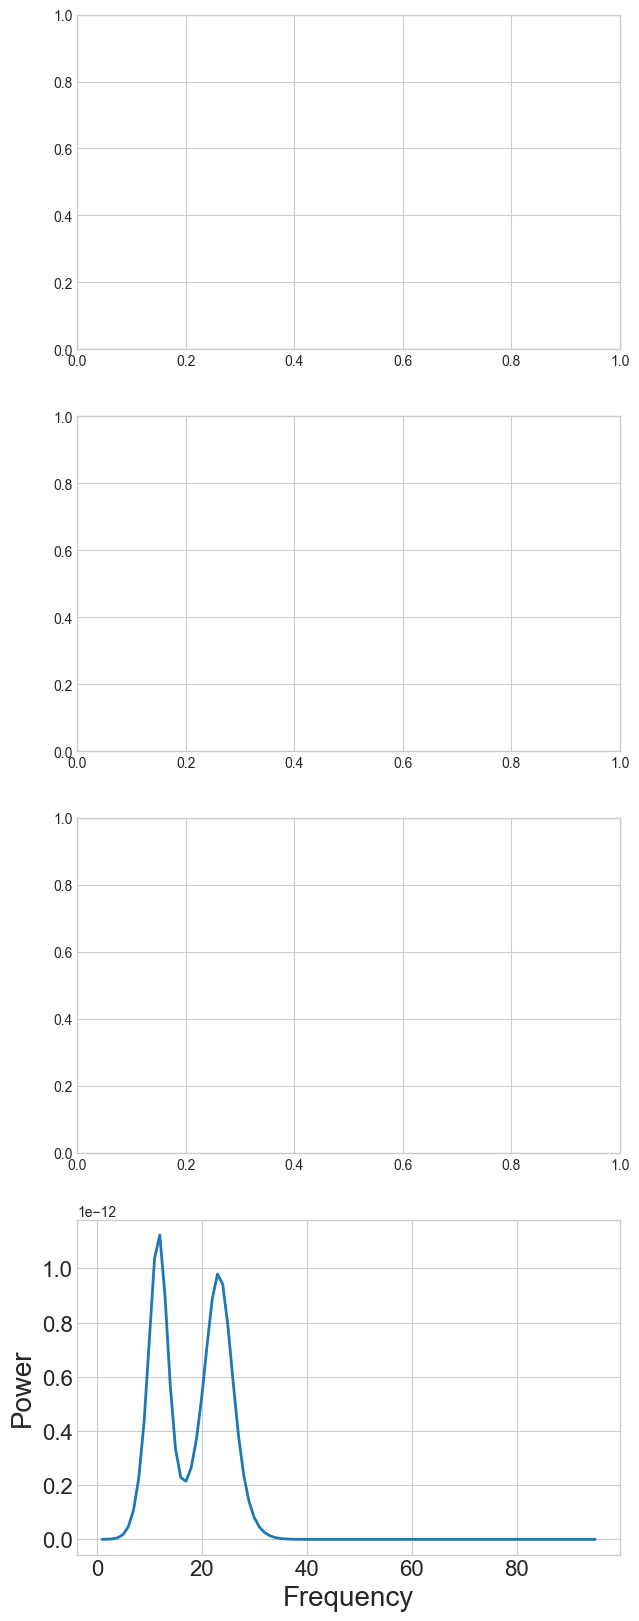

In [92]:
fig, ax = plt.subplots(4,1, figsize=(7,20))
plot_spectrum(np.arange(1, (len(power)+1)), power, log_freqs=False, log_powers=False, ax=ax[3])
                

In [93]:
common_reference = load_data.load_externalized_pickle(filename="externalized_contacts_common_reference")

In [94]:
common_reference

,BIDS_id,subject,hemisphere,contact,original_ch_name
024_Left_3,noBIDS24,024,Left,3,LFP_L_08_STN_MT
025_Left_0,L001,025,Left,0,LFP_L_01_STN_MT
028_Left_3,noBIDS28,028,Left,3,LFP_L_08_STN_MT
029_Right_3,noBIDS29,029,Right,3,LFP_R_08_STN_MT
030_Left_0,EL007,030,Left,0,LFP_L_01_STN_MT
032_Left_3,L003,032,Left,3,LFP_L_08_STN_MT
047_Left_0,L007,047,Left,0,LFP_L_01_STN_MT
048_Right_0,noBIDS48,048,Right,0,LFP_R_01_STN_MT
048_Right_2C,noBIDS48,048,Right,2C,LFP_R_07_STN_MT
048_Left_0,noBIDS48,048,Left,0,LFP_L_01_STN_MT


In [27]:
power_spectra_data =load_data.load_externalized_pickle(filename="externalized_power_spectra_250Hz_artefact_free")
power_spectra_data.head()

,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,filtered,lfp_data,frequencies,times,power,power_average_over_time,power_std,power_sem
L001_Right_0_filtered,L001,025,Right,025_Right,0,LFP_R_01_STN_MT,filtered,"[-7.59355112107618e-07, 9.768670360289528e-06,...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[6.240154022593714e-17, 2.939756039377465e-15...","[9.475302063374772e-15, 3.992891451859159e-15,...","[1.286243314542217e-14, 5.3360638726692855e-15...","[1.0432810920249042e-15, 4.3281193233446594e-1..."
L001_Right_0_unfiltered,L001,025,Right,025_Right,0,LFP_R_01_STN_MT,unfiltered,"[0.004981967630519316, 0.004993935731201689, 0...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[1.0577415654361825e-11, 5.177284051871148e-1...","[2.595180305392358e-12, 1.3324945990664859e-11...","[6.282415524911424e-12, 1.5637176278312496e-11...","[5.095711872925484e-13, 1.2683424791700508e-12..."
L001_Right_1A_filtered,L001,025,Right,025_Right,1A,LFP_R_02_STN_MT,filtered,"[-5.4162502175678e-07, 8.516945973380159e-06, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[5.4698190638125844e-17, 2.789957802883439e-1...","[1.1430962989460658e-14, 4.842443656275809e-15...","[1.6203212692813798e-14, 6.850112232353752e-15...","[1.314254094956132e-15, 5.556174706188229e-16,..."
L001_Right_1A_unfiltered,L001,025,Right,025_Right,1A,LFP_R_02_STN_MT,unfiltered,"[0.04113918003087577, 0.04115062690047614, 0.0...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[1.3629756577203503e-12, 5.210482416985302e-1...","[8.060497209650237e-12, 3.942670102156593e-11,...","[7.472050982021948e-12, 2.7811069843630833e-11...","[6.060633645325551e-13, 2.255775636600344e-12,..."
L001_Right_1B_filtered,L001,025,Right,025_Right,1B,LFP_R_03_STN_MT,filtered,"[-7.327385311077718e-07, 8.641706900393375e-06...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[2.761192529825985e-16, 1.598304851275642e-15...","[8.770372233153225e-15, 3.716546219910624e-15,...","[1.2357467561237215e-14, 5.211038406458603e-15...","[1.0023229746805998e-15, 4.226710279313494e-16..."


In [50]:
data_to_FOOOF = power_spectra_data.loc[power_spectra_data.filtered == "unfiltered"]
data_to_FOOOF = data_to_FOOOF.loc[data_to_FOOOF.BIDS_id == "L003"]
data_to_FOOOF = data_to_FOOOF.loc[data_to_FOOOF.hemisphere == "Right"]
data_to_FOOOF = data_to_FOOOF.loc[data_to_FOOOF.contact == "1A"]
power_spectrum = data_to_FOOOF.power_average_over_time.values[0]
freqs = data_to_FOOOF.frequencies.values[0]

In [43]:
data_to_FOOOF


,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,filtered,lfp_data,frequencies,times,power,power_average_over_time,power_std,power_sem
L001_Right_2B_unfiltered,L001,025,Right,025_Right,2B,LFP_R_06_STN_MT,unfiltered,"[0.0545578677518972, 0.054570446793723554, 0.0...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5, 1.252, 2.004, 2.756, 3.508, 4.26, 5.012,...","[[3.553381807914313e-12, 3.465655154407796e-13...","[1.1427207759675277e-12, 8.015876630440298e-12...","[2.7763941607578664e-12, 8.858333624602794e-12...","[2.2519530318864596e-13, 7.18505734716742e-13,..."


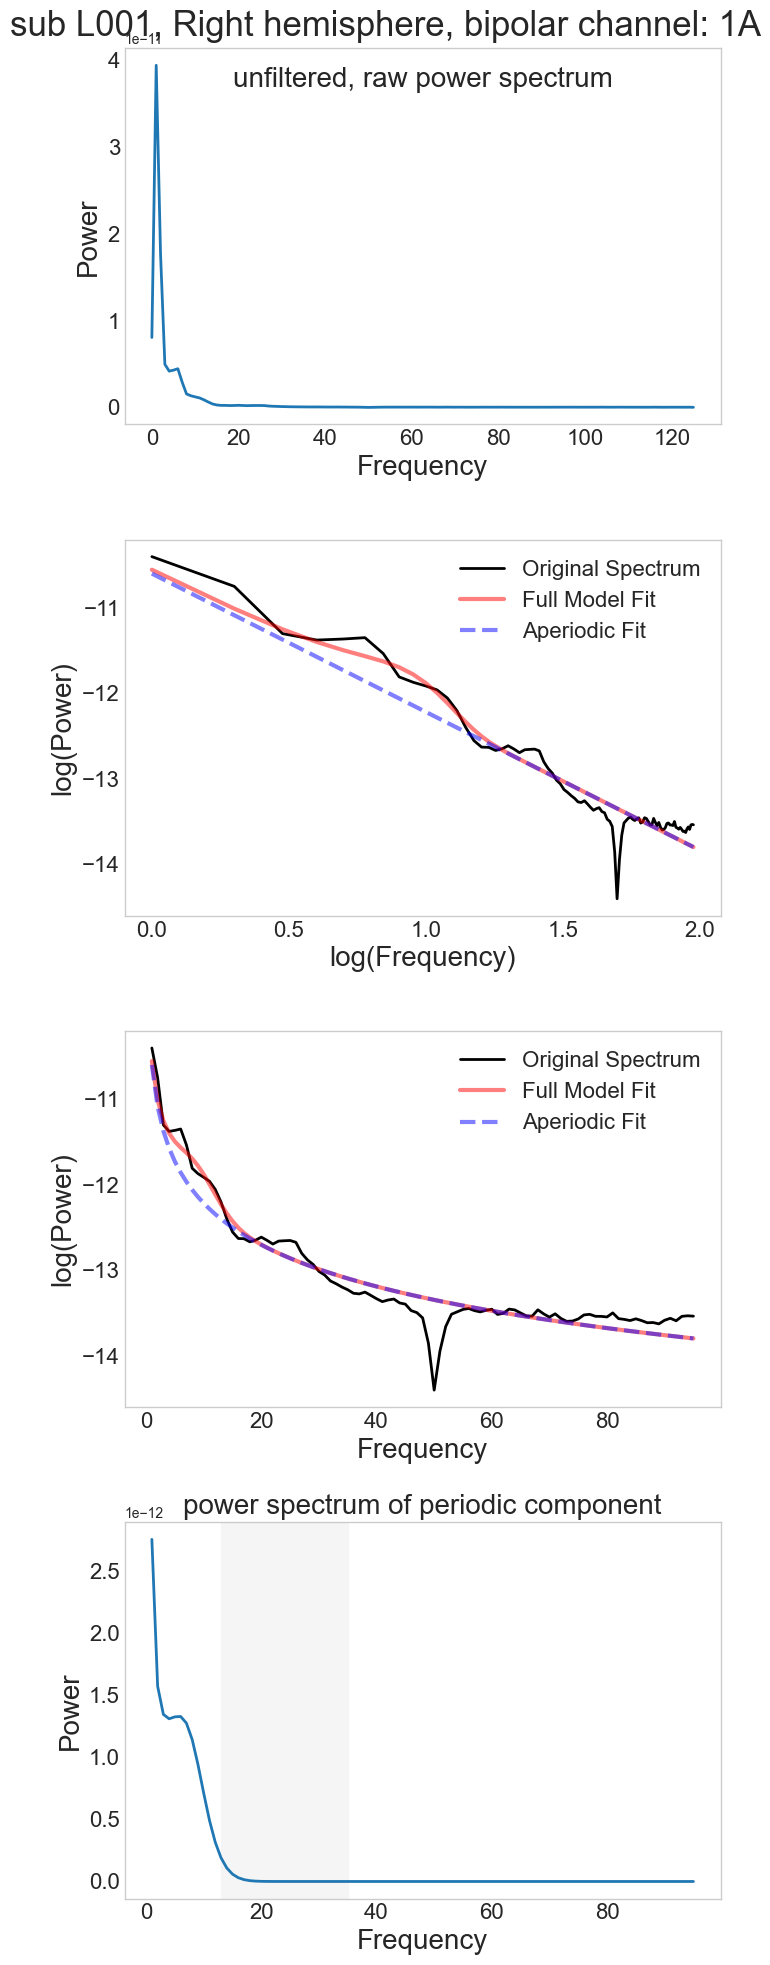

In [96]:
############ SET PLOT LAYOUT ############
fig, ax = plt.subplots(4,1, figsize=(7,20))

# Plot the unfiltered Power spectrum in first ax
plot_spectrum(freqs, power_spectrum, log_freqs=False, log_powers=False,
                ax=ax[0])
ax[0].grid(False)

############ SET FOOOF MODEL ############
freq_range = [1, 95] # frequency range to fit FOOOF model
fooof_results = {}

model = fooof.FOOOF(
        peak_width_limits=[2, 15.0],
        max_n_peaks=6,
        min_peak_height=0.2,
        peak_threshold=2.0,
        aperiodic_mode="fixed", # fitting without knee component
        verbose=True,
    )

# always fit a large Frequency band, later you can select Peaks within specific freq bands
model.fit(freqs=freqs, power_spectrum=power_spectrum, freq_range=freq_range)

# Plot an example power spectrum, with a model fit in second ax
# model.plot(plot_peaks='shade', peak_kwargs={'color' : 'green'}, ax=ax[1])
model.plot(ax=ax[1], plt_log=True) # to evaluate the aperiodic component
model.plot(ax=ax[2], plt_log=False) # To see the periodic component better without log in frequency axis
ax[1].grid(False)
ax[2].grid(False)

# check if fooof attributes are None:
if model._peak_fit is None:
    #print(f"subject {subject}, session {ses}, {chan}: model peak fit is None.")
    print("model peak fit is None")
    # continue

if model._ap_fit is None:
    #print(f"subject {subject}, session {ses}, {chan}: model aperiodic fit is None.")
    print("model aperiodic fit is None")
    #continue


# plot only the fooof spectrum of the periodic component
fooof_power_spectrum = 10**(model._peak_fit + model._ap_fit) - (10**model._ap_fit)
plot_spectrum(np.arange(1, (len(fooof_power_spectrum)+1)), fooof_power_spectrum, log_freqs=False, log_powers=False, ax=ax[3])
# frequencies: 1-95 Hz with 1 Hz resolution

# titles
fig.suptitle(f"sub L001, Right hemisphere, bipolar channel: 1A",
                        fontsize=25)

ax[0].set_title("unfiltered, raw power spectrum", fontsize=20, y=0.97, pad=-20)
ax[3].set_title("power spectrum of periodic component", fontsize=20)

# mark beta band
x1 = 13
x2 = 35
ax[3].axvspan(x1, x2, color="whitesmoke")
ax[3].grid(False)

fig.tight_layout()
#fig.savefig(os.path.join(local_figures_path, f"fooof_model_sub{subject}_{hemisphere}_{ses}_{chan}.svg"), bbox_inches="tight", format="svg")
#fig.savefig(os.path.join(local_figures_path, f"fooof_model_sub{subject}_{hemisphere}_{ses}_{chan}.png"), bbox_inches="tight")


# extract parameters from the chosen model
# model.print_results()

############ SAVE APERIODIC PARAMETERS ############
# goodness of fit
err = model.get_params('error')
r_sq = model.r_squared_

# aperiodic components
exp = model.get_params('aperiodic_params', 'exponent')
offset = model.get_params('aperiodic_params', 'offset')

# periodic component
log_power_fooof_periodic_plus_aperiodic = model._peak_fit + model._ap_fit # periodic+aperiodic component in log Power axis
fooof_periodic_component = model._peak_fit # just periodic component, flattened spectrum

############ SAVE ALL PEAKS IN ALPHA; HIGH AND LOW BETA ############

number_peaks = model.n_peaks_

# get the highest Peak of each frequency band as an array: CF center frequency, Power, BandWidth
alpha_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(8.0, 12.0),
    select_highest=True,
    attribute="peak_params"
    )

low_beta_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(13.0, 20.0),
    select_highest=True,
    attribute="peak_params",
    )

high_beta_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(21.0, 35.0),
    select_highest=True,
    attribute="peak_params",
    )

beta_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(13.0, 35.0),
    select_highest=True,
    attribute="peak_params",
    )

gamma_peak = fooof.analysis.get_band_peak_fm(
    model,
    band=(60.0, 90.0),
    select_highest=True,
    attribute="peak_params",
    )

# save all results in dictionary
#STN = "_".join([subject, hemisphere])

fooof_results[f"L001_Right_1A"] = ["L001_Right", "1A", 
                                    err, r_sq, exp, offset, 
                                    fooof_power_spectrum, log_power_fooof_periodic_plus_aperiodic, fooof_periodic_component,
                                    number_peaks, alpha_peak, low_beta_peak, high_beta_peak, beta_peak, gamma_peak]

### Calculate periodic beta average and beta ranks 

In [95]:
beta_ranks = externalized.calculate_periodic_beta_power(filtered = "notch-filtered")

fooof_externalized_beta_ranks_all_contacts.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results
fooof_externalized_beta_ranks_directional_contacts.pickle 
written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/results


In [96]:
beta_ranks_directional_contacts = load_data.load_externalized_pickle(filename = "fooof_externalized_beta_ranks_directional_contacts")

In [97]:
beta_ranks_directional_contacts.head()

,filtered,BIDS_id,subject,hemisphere,subject_hemisphere,contact,original_ch_name,fooof_error,fooof_r_sq,fooof_exponent,...,periodic_plus_aperiodic_power_log,fooof_periodic_flat,fooof_number_peaks,alpha_peak_CF_power_bandWidth,low_beta_peak_CF_power_bandWidth,high_beta_peak_CF_power_bandWidth,beta_peak_CF_power_bandWidth,gamma_peak_CF_power_bandWidth,beta_average,beta_rank
1,notch-filtered,noBIDS24,024,Right,024_Right,1A,LFP_R_02_STN_MT,0.066057,0.964694,1.500684,...,"[-10.70405206836846, -11.153278866263644, -11....","[0.0010063554829384076, 0.0035303460556046803,...",2,"[9.779877022099262, 0.49446823380384863, 4.910...","[nan, nan, nan]","[23.18129071617084, 0.3075725158588103, 11.642...","[23.18129071617084, 0.3075725158588103, 11.642...","[nan, nan, nan]",1.138786e-13,1.0
2,notch-filtered,noBIDS24,024,Right,024_Right,1B,LFP_R_03_STN_MT,0.080942,0.961720,1.628576,...,"[-10.730761273296734, -11.215425509601106, -11...","[0.0025404375288719753, 0.008126558036393323, ...",1,"[9.799469030026241, 0.5746430840126511, 5.3432...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",8.522418e-15,5.0
3,notch-filtered,noBIDS24,024,Right,024_Right,1C,LFP_R_04_STN_MT,0.079102,0.961635,1.655262,...,"[-10.633912071968812, -11.126093283100802, -11...","[0.0030693018280669175, 0.00917167938810932, 0...",1,"[9.87960510319882, 0.5288052682632625, 5.53350...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",1.082527e-14,3.0
4,notch-filtered,noBIDS24,024,Right,024_Right,2A,LFP_R_05_STN_MT,0.091643,0.956784,1.689481,...,"[-10.583157670079412, -11.087488223614102, -11...","[0.0018199135774821804, 0.0060737884474722495,...",1,"[9.930752903391193, 0.5441671366582632, 5.2897...","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]",1.015995e-14,4.0
5,notch-filtered,noBIDS24,024,Right,024_Right,2B,LFP_R_06_STN_MT,0.083905,0.959665,1.582553,...,"[-10.867018641538285, -11.33982510619861, -11....","[0.002335296007359338, 0.0059248060242120485, ...",2,"[9.201716664875278, 0.682440565232632, 4.36282...","[16.09593080172779, 0.18617882229349902, 9.944...","[nan, nan, nan]","[16.09593080172779, 0.18617882229349902, 9.944...","[nan, nan, nan]",2.933252e-14,2.0
